Fahad Shakeel - 0477898
Assignment 1 - Task 1 - Renewables - Conversion of Wind Speeds to Power Output of a Wind Turbine

In [8]:
##taks_1a_importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

In [9]:
##task_2b
wind_data=pd.read_csv('https://tubcloud.tu-berlin.de/s/X8WGZxA6554iSz9/download/wind-speeds.csv', index_col=0 , parse_dates=['time'])
wind_data

,wind_speed_m_s
time,
2019-01-01 00:00:00,11.484892
2019-01-01 01:00:00,11.835971
2019-01-01 02:00:00,12.323022
2019-01-01 03:00:00,13.186331
2019-01-01 04:00:00,14.068345
...,...
2019-12-31 19:00:00,6.958993
2019-12-31 20:00:00,6.698561
2019-12-31 21:00:00,6.507914


In [10]:
##task 1c

index_type =type(wind_data)
date_time_index=isinstance(wind_data.index, pd.DatetimeIndex)
index_type
date_time_index

True

In [17]:
##task 1d

##general conversion formula 
##U(z)/U(zr) =ln(z/z0)/ln (zr/z0)
##where zo= is terrain-dependent roughness length in our case this is 0.03 because we have  open flat grassland(mentioned in the lec 3)
##z is the height
##zr is the reference 

##log_law_eq(z, z0, zr, wind_data):
z = 90
z0 = 0.03
zr = 10 
n = mt.log(z / z0)
d = mt.log(zr / z0)
cf = n / d

##print(cf)
Hub_wind_data = wind_data['wind_speed_m_s'] * cf

wind_data['Hub_wind_data'] = wind_data['wind_speed_m_s'] * cf
    






print("Hub Wind Data for the first 10 hours:")
print(Hub_wind_data.head(10))

##print(wind_data)

Hub Wind Data for the first 10 hours:
time
2019-01-01 00:00:00    15.828887
2019-01-01 01:00:00    16.312757
2019-01-01 02:00:00    16.984027
2019-01-01 03:00:00    18.173870
2019-01-01 04:00:00    19.389494
2019-01-01 05:00:00    19.311163
2019-01-01 06:00:00    18.862988
2019-01-01 07:00:00    19.221924
2019-01-01 08:00:00    19.665141
2019-01-01 09:00:00    20.118273
Name: wind_speed_m_s, dtype: float64


In [18]:
##task 1e
##UNITS: wind speeds are in m/s & power in MW

##for vesta model
def vestas_model(wind_speed):
    cut_in_speed = 4.0
    cut_out_speed = 22.0
    if wind_speed < cut_in_speed:
        return 0.0
    elif wind_speed > cut_out_speed:
        return 0.0
    elif cut_in_speed <= wind_speed < 6.0:
        return 0.2
    elif 6.0<= wind_speed<8.0:
        return 0.5
    elif 8.0<= wind_speed<10.0:
        return 1.3
    elif 10.0 <= wind_speed<12.0:
        return 2.5
    elif 12.0  <= wind_speed <14.0:
        return 3.0
    elif 14<= wind_speed<16.0:
        return 3.0
    else:
        return 3.0

##ecorn model curve 
def ecorn_model(wind_speed):
    cut_in_speed=4.0
    cut_out_speed=25.0
    if wind_speed < cut_in_speed or wind_speed > cut_out_speed:
        return 0.0
    elif cut_in_speed <= wind_speed < 6.0:
        return 0.4
    elif 6.0<= wind_speed<8.0:
        return 0.8
    elif 8.0<= wind_speed<10.0:
        return 1.5
    elif 10.0 <= wind_speed<12.0:
        return 2.1
    elif 12.0  <= wind_speed <14.0:
        return 2.4
    elif 14<= wind_speed<16.0:
        return 2.9
    else: 
        return 3.0
#Print(power_curve_enercon)
#print(power_curve_vestas)

In [19]:
##task1(f)

vesta_wind_data = []
for wind in Hub_wind_data:
    vesta_wind_data.append(vestas_model(wind))

ecorn_wind_data = []
for wind in Hub_wind_data:
    ecorn_wind_data.append(ecorn_model(wind))


last_20h_vestas = vesta_wind_data[-20:]
last_20h_econ = ecorn_wind_data[-20:]
print("last 20 hours  of power generation from vestas in MW:")
print(last_20h_vestas)
print("last 22 hours of power generation from econ in MW:")
print(last_20h_econ)

last 20 hours  of power generation from vestas in MW:
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.5, 2.5, 2.5, 2.5, 1.3, 1.3, 1.3, 1.3, 1.3]
last 22 hours of power generation from econ in MW:
[3.0, 3.0, 3.0, 3.0, 3.0, 2.9, 2.9, 2.9, 2.4, 2.4, 2.4, 2.1, 2.1, 2.1, 2.1, 1.5, 1.5, 1.5, 1.5, 1.5]


In [20]:
##task1(g)
total_vesta= round(sum(vesta_wind_data)/1000,2)
total_econ= round(sum(ecorn_wind_data)/1000,2)

print("energy produced yearly by Enercon",total_econ,"GW")
print("energy produced yearly by Vesta",total_vesta,"GW")


energy produced yearly by Enercon 13.26 GW
energy produced yearly by Vesta 13.39 GW


In [21]:

##relative margin calculation 

def rel_margin(total_vesta, total_econ):
    abs_diff = abs(total_vesta - total_econ)
    rel_margin=(abs_diff /((total_vesta+total_econ)/2))*100
    return rel_margin


margin= rel_margin(total_vesta, total_econ)

                   
if total_vesta>total_econ:
                   print("vestas model has the higher outoput of",total_vesta, "GW")
else: print("Enercon model has thr higher output of", total_econ, "GW" )

print(f"Relative margin of energy output is.{margin:.2f}%" )
                



                   
                

vestas model has the higher outoput of 13.39 GW
Relative margin of energy output is.0.98%


In [22]:
##task 1h Normalise the power output time series by the turbine’s rated capacity.

wind_data['power_vestas'] = vesta_wind_data
wind_data ['normalise_vesta'] = wind_data.power_vestas.apply(lambda z: z / 3.0)
wind_data



,wind_speed_m_s,Hub_wind_data,power_vestas,normalise_vesta
time,,,,
2019-01-01 00:00:00,11.484892,15.828887,3.0,1.000000
2019-01-01 01:00:00,11.835971,16.312757,3.0,1.000000
2019-01-01 02:00:00,12.323022,16.984027,3.0,1.000000
2019-01-01 03:00:00,13.186331,18.173870,3.0,1.000000
2019-01-01 04:00:00,14.068345,19.389494,3.0,1.000000
...,...,...,...,...
2019-12-31 19:00:00,6.958993,9.591131,1.3,0.433333
2019-12-31 20:00:00,6.698561,9.232195,1.3,0.433333
2019-12-31 21:00:00,6.507914,8.969438,1.3,0.433333


In [23]:
##task 1i What is the annual average capacity factor of the wind turbine?
av_cap_fac = round((sum(wind_data.power_vestas)/ len(wind_data.power_vestas))/(wind_data.power_vestas.max()),3)

print("Annual average capacity factor of vestas turbine is", av_cap_fac)


Annual average capacity factor of vestas turbine is 0.51


In [24]:
##task 1j

Mont_av_cap=wind_data.normalise_vesta.resample('M').mean()
Mont_av_cap

/var/folders/d3/5j131h193zl4dd728sc732ym0000gn/T/ipykernel_17250/3924617279.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Mont_av_cap=wind_data.normalise_vesta.resample('M').mean()


time
2019-01-31    0.561335
2019-02-28    0.628472
2019-03-31    0.656183
2019-04-30    0.473472
2019-05-31    0.504211
2019-06-30    0.422269
2019-07-31    0.433378
2019-08-31    0.276568
2019-09-30    0.568333
2019-10-31    0.478584
2019-11-30    0.500509
2019-12-31    0.620923
Freq: ME, Name: normalise_vesta, dtype: float64

In [25]:
##task 1k
zero_power= round(sum(wind_data.power_vestas==0)/len(wind_data.power_vestas)*100,1)
print(zero_power, "%of the time produced no power")

4.0 %of the time produced no power


In [26]:
##task 1l
full_power= round(sum(wind_data.power_vestas==3.0)/len(wind_data.power_vestas)*100,1)
print(full_power, "%of the time produced at rated cpacity")

18.9 %of the time produced at rated cpacity


In [27]:
##tatsk 1m

len(wind_data[wind_data.Hub_wind_data>=22])


0

In [28]:
##  no shutdown 


Text(0, 0.5, 'capacity factor(per units)')

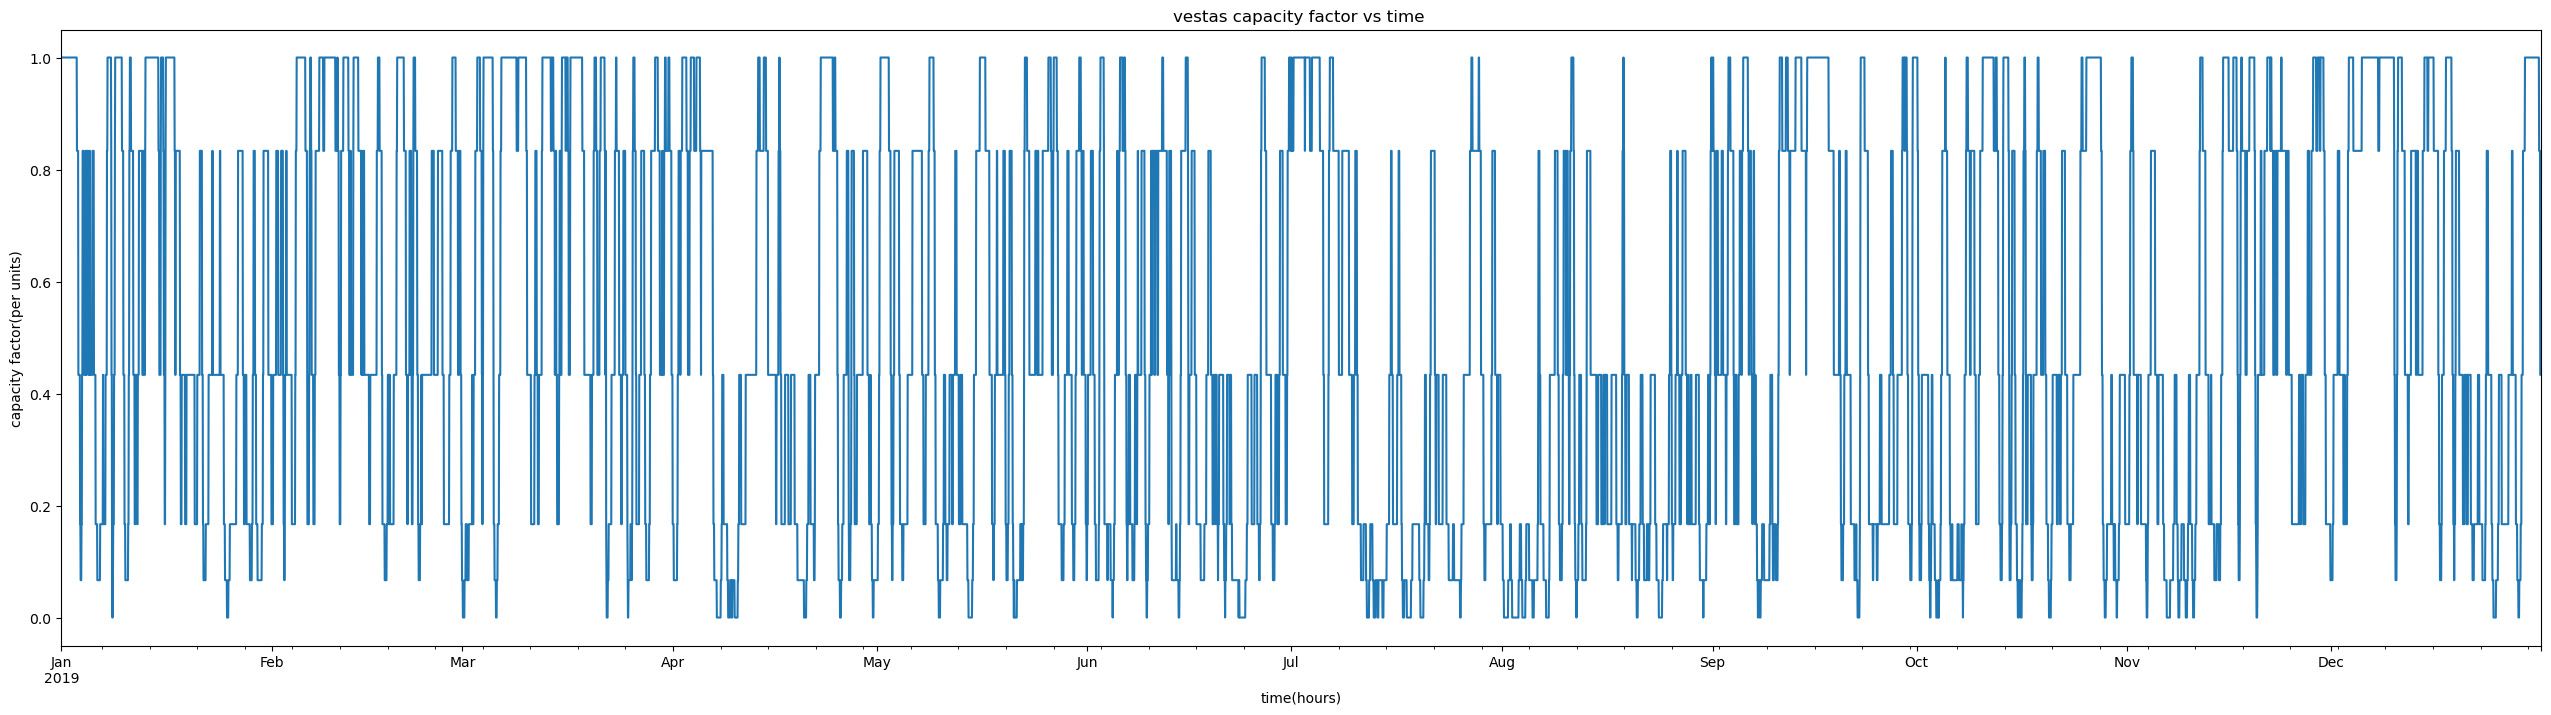

In [29]:
##task 1n
y=wind_data.normalise_vesta

ts = pd.Series(y, index=wind_data.index)

ts.plot(figsize = (32, 8) )

plt.title('vestas capacity factor vs time ')

plt.xlabel('time(hours)')

plt.ylabel('capacity factor(per units)')
